# Data Extraction

In [1]:
# importing required libraries

import tweepy
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import os

In [4]:

"""
At present, with the current access tweet retrieval is limited to the history of the past 7 days.

"""
# Fill in your API credentials
# User tokens and API credentials
consumer_key = 'ijKxmlyPvueWuWlzjH7htDtBq'
consumer_secret = 'LhzuJ8nrrFSHFLlqTMIbhXqB2vu6IS1OUwMO0gE8N1s5yoh8CP'
access_key = '992092540332662784-9Wc4sukYGUh8JEK7mz852r3nVrY2kZj'
access_secret = 'J3CPcz7ofMiNBQD3Cg2W6SjdtWBFiPXVg8uqI64KmzAaw'

# Authenticate with the Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

# Create the API object
api = tweepy.API(auth, wait_on_rate_limit=True)

# Get input from the user
country = input("Enter a country: ").lower()
city = input("Enter a city: ").lower()
radius = input("Enter a radius (in km): ")
hashtags = input("Enter hashtags separated by a space: ").split()
hashtags = ["#" + tag if not tag.startswith("#") else tag for tag in hashtags] # Add # symbol if missing

# Convert city and country to latitude and longitude using geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_geocoder")
location = geolocator.geocode(city + ", " + country)
latitude = location.latitude
longitude = location.longitude

# Create an empty dictionary to store the tweet data for each hashtag
hashtag_data = {}

# Search for tweets that match each hashtag and geolocation, and store the data in the dictionary
for hashtag in hashtags:
    tweet_data = []
    for tweet in tweepy.Cursor(api.search_tweets, q=hashtag, geocode=f"{latitude},{longitude},{radius}km", tweet_mode="extended", lang="en").items():
        # Extract the information we want from each tweet
        data = {
            "id": tweet.id,
            "created_at": tweet.created_at,
            "full_text": tweet.full_text,
            "user_id": tweet.user.id,
            "user_name": tweet.user.name,
            "user_screen_name": tweet.user.screen_name,
            "user_location": tweet.user.location,
            "retweet_count": tweet.retweet_count,
            "favorite_count": tweet.favorite_count,
            "hashtags": [hashtag["text"] for hashtag in tweet.entities["hashtags"]]
        }
        tweet_data.append(data)
    
    # Convert the tweet data to a DataFrame
    df = pd.DataFrame(tweet_data)

    # Save the dataframe to a CSV

    df.to_csv('tweet_data.csv', index=False)
    
    # Save the DataFrame to a CSV file based on city, country and specified radius.
    # This will also create a seperate CSV file based on matches for each hashtag.
    filename = f"{hashtag.replace('#', '')}_{city}_{country}_{radius}km"

    df.to_csv(f"{filename}.csv", index=False)
    
    # Add the DataFrame to the dictionary
    hashtag_data[hashtag] = df

# Print the number of tweets found for each hashtag
for hashtag, df in hashtag_data.items():
    print(f"{hashtag}: {len(df)} tweets found.")

Enter a city: london
Enter a country: uk
Enter a radius (in km): 100
Enter hashtags separated by a space: Nike Adidas


#Nike: 64 tweets found.
#Adidas: 64 tweets found.


In [5]:
# Load the CSV files into pandas dataframes
df1 = pd.read_csv('/content/Mubarak_london_uk_5000km.csv')
df2 = pd.read_csv('/content/Ramadan_london_uk_5000km.csv')

# Concatenate the dataframes vertically (row-wise)
merged_df = pd.concat([df1, df2])

# Save the merged dataframe to a new CSV file
merged_df.to_csv("/content/merged_file.csv", index=False)

,id,created_at,full_text,user_id,user_name,user_screen_name,user_location,retweet_count,favorite_count,hashtags
0,1638564770117828611,2023-03-22 15:34:18+00:00,Nike's digital sales rise by 20%\n\nhttps://t....,19445565,Retail Systems,RetailSystems,London,0,0,"['nike', 'finances', 'business', 'ecommerce']"
1,1638555143456030720,2023-03-22 14:56:03+00:00,The difference between me and many other ‘Yout...,1122895799623589889,Mr. Prospect,MrProspect1,"London, United Kingdom",0,2,"['PriceOfTheProspectWentUp', 'Nike']"
2,1638549403240726528,2023-03-22 14:33:15+00:00,What if @nike did some art focused collaborati...,1367816738293878787,Dan Can,dannnsolero,London,0,3,"['Nike', 'klimt', 'AIArtwork', 'Aifashion', 'a..."
3,1638543574529720321,2023-03-22 14:10:05+00:00,US open:\n\n#Stocks steady ahead of the Fed ra...,1336653556926001152,Fiona Cincotta City Index,FionaCityIndex,London,0,0,"['Stocks', 'Nike']"
4,1638486392748531714,2023-03-22 10:22:52+00:00,@davidginolaofficial signing for @psg in 1992 ...,1359234440959057920,Greatest Kits,greatest_kits,"London, England",0,2,"['psg', 'nike', 'shirt', 'france', 'french', '..."


In [ ]:
df = pd.read_csv('/content/merged_file.csv')
df.head()

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
tweetsDataFrame = pd.read_csv('merged_file.csv')

In [8]:
tweetsDataFrame = tweetsDataFrame.rename(columns={'full_text': 'Tweets'}) 

In [9]:
tweetsDataFrame.head()

,id,created_at,Tweets,user_id,user_name,user_screen_name,user_location,retweet_count,favorite_count,hashtags
0,1638564770117828611,2023-03-22 15:34:18+00:00,Nike's digital sales rise by 20%\n\nhttps://t....,19445565,Retail Systems,RetailSystems,London,0,0,"['nike', 'finances', 'business', 'ecommerce']"
1,1638555143456030720,2023-03-22 14:56:03+00:00,The difference between me and many other ‘Yout...,1122895799623589889,Mr. Prospect,MrProspect1,"London, United Kingdom",0,2,"['PriceOfTheProspectWentUp', 'Nike']"
2,1638549403240726528,2023-03-22 14:33:15+00:00,What if @nike did some art focused collaborati...,1367816738293878787,Dan Can,dannnsolero,London,0,3,"['Nike', 'klimt', 'AIArtwork', 'Aifashion', 'a..."
3,1638543574529720321,2023-03-22 14:10:05+00:00,US open:\n\n#Stocks steady ahead of the Fed ra...,1336653556926001152,Fiona Cincotta City Index,FionaCityIndex,London,0,0,"['Stocks', 'Nike']"
4,1638486392748531714,2023-03-22 10:22:52+00:00,@davidginolaofficial signing for @psg in 1992 ...,1359234440959057920,Greatest Kits,greatest_kits,"London, England",0,2,"['psg', 'nike', 'shirt', 'france', 'french', '..."


In [10]:
print(tweetsDataFrame.head())
print(tweetsDataFrame.info())
print(tweetsDataFrame.shape)

                    id                 created_at  \
0  1638564770117828611  2023-03-22 15:34:18+00:00   
1  1638555143456030720  2023-03-22 14:56:03+00:00   
2  1638549403240726528  2023-03-22 14:33:15+00:00   
3  1638543574529720321  2023-03-22 14:10:05+00:00   
4  1638486392748531714  2023-03-22 10:22:52+00:00   

                                              Tweets              user_id  \
0  Nike's digital sales rise by 20%\n\nhttps://t....             19445565   
1  The difference between me and many other ‘Yout...  1122895799623589889   
2  What if @nike did some art focused collaborati...  1367816738293878787   
3  US open:\n\n#Stocks steady ahead of the Fed ra...  1336653556926001152   
4  @davidginolaofficial signing for @psg in 1992 ...  1359234440959057920   

                   user_name user_screen_name           user_location  \
0             Retail Systems    RetailSystems                  London   
1               Mr. Prospect      MrProspect1  London, United Kingdom   

# Data Preprocessing

In [11]:
# Remove duplication
tweetsDataFrame["Tweets"] = tweetsDataFrame["Tweets"].str.lower()

""" specific to lowercase due to limitation of being used in vector """

' specific to lowercase due to limitation of being used in vector '

In [12]:
tweetsDataFrame

,id,created_at,Tweets,user_id,user_name,user_screen_name,user_location,retweet_count,favorite_count,hashtags
0,1638564770117828611,2023-03-22 15:34:18+00:00,nike's digital sales rise by 20%\n\nhttps://t....,19445565,Retail Systems,RetailSystems,London,0,0,"['nike', 'finances', 'business', 'ecommerce']"
1,1638555143456030720,2023-03-22 14:56:03+00:00,the difference between me and many other ‘yout...,1122895799623589889,Mr. Prospect,MrProspect1,"London, United Kingdom",0,2,"['PriceOfTheProspectWentUp', 'Nike']"
2,1638549403240726528,2023-03-22 14:33:15+00:00,what if @nike did some art focused collaborati...,1367816738293878787,Dan Can,dannnsolero,London,0,3,"['Nike', 'klimt', 'AIArtwork', 'Aifashion', 'a..."
3,1638543574529720321,2023-03-22 14:10:05+00:00,us open:\n\n#stocks steady ahead of the fed ra...,1336653556926001152,Fiona Cincotta City Index,FionaCityIndex,London,0,0,"['Stocks', 'Nike']"
4,1638486392748531714,2023-03-22 10:22:52+00:00,@davidginolaofficial signing for @psg in 1992 ...,1359234440959057920,Greatest Kits,greatest_kits,"London, England",0,2,"['psg', 'nike', 'shirt', 'france', 'french', '..."
...,...,...,...,...,...,...,...,...,...,...
59,1635546424199847937,2023-03-14 07:40:29+00:00,#newvideo #unboxing #video of @nike air vaporm...,1244683151810666498,CHASE J LONDON,CHASEJLONDON,"London, England",1,1,"['NEWVIDEO', 'UNBOXING', 'VIDEO', 'London', 's..."
60,1635399973587259393,2023-03-13 21:58:32+00:00,🏀new mj🏀\n\n#illustration #illustrator #michae...,19968465,Dale Edwin Murray,daleedwinmurray,London,0,8,"['illustration', 'illustrator', 'michaeljordan..."
61,1635350360956231681,2023-03-13 18:41:24+00:00,nike and corteiz have launched their highly an...,2892167147,C R U S H,CrushFFF,London,0,1,"['Nike', 'Corteiz', 'AirMAX95s', 'JorjaSmith',..."
62,1635294744963334151,2023-03-13 15:00:24+00:00,introducing the #nike 'air max furyosa' ❤️ @of...,148295976,atria Watford,atriaWatford,"Watford, Hertfordshire",0,0,['Nike']


Removing Hashtags

In [13]:
tweetsDataFrame["Tweets"][1]

'the difference between me and many other ‘youth sector’ operatives  is simply that..\n\ni’m actually someone to look up to..\n\ni don’t just tell young people they can succeed\n\ni showcase them to success and teach them everything i do to create mine🔮\n#priceoftheprospectwentup #nike https://t.co/06kjtkaoov'

In [14]:
import re
for i in range(0, len(tweetsDataFrame["Tweets"])):
    tweetsDataFrame["Tweets"][i] = re.sub("@[A-Za-z0-9_]+","", tweetsDataFrame["Tweets"][i])
    tweetsDataFrame["Tweets"][i] = re.sub("#[A-Za-z0-9_]+","", tweetsDataFrame["Tweets"][i])
    
tweetsDataFrame

<ipython-input-14-718e9c64b640>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetsDataFrame["Tweets"][i] = re.sub("@[A-Za-z0-9_]+","", tweetsDataFrame["Tweets"][i])
<ipython-input-14-718e9c64b640>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetsDataFrame["Tweets"][i] = re.sub("#[A-Za-z0-9_]+","", tweetsDataFrame["Tweets"][i])


,id,created_at,Tweets,user_id,user_name,user_screen_name,user_location,retweet_count,favorite_count,hashtags
0,1638564770117828611,2023-03-22 15:34:18+00:00,nike's digital sales rise by 20%\n\nhttps://t....,19445565,Retail Systems,RetailSystems,London,0,0,"['nike', 'finances', 'business', 'ecommerce']"
1,1638555143456030720,2023-03-22 14:56:03+00:00,the difference between me and many other ‘yout...,1122895799623589889,Mr. Prospect,MrProspect1,"London, United Kingdom",0,2,"['PriceOfTheProspectWentUp', 'Nike']"
2,1638549403240726528,2023-03-22 14:33:15+00:00,what if did some art focused collaborations?\...,1367816738293878787,Dan Can,dannnsolero,London,0,3,"['Nike', 'klimt', 'AIArtwork', 'Aifashion', 'a..."
3,1638543574529720321,2023-03-22 14:10:05+00:00,us open:\n\n steady ahead of the fed rate deci...,1336653556926001152,Fiona Cincotta City Index,FionaCityIndex,London,0,0,"['Stocks', 'Nike']"
4,1638486392748531714,2023-03-22 10:22:52+00:00,signing for in 1992 🇫🇷\n\nunbelievable shirt...,1359234440959057920,Greatest Kits,greatest_kits,"London, England",0,2,"['psg', 'nike', 'shirt', 'france', 'french', '..."
...,...,...,...,...,...,...,...,...,...,...
59,1635546424199847937,2023-03-14 07:40:29+00:00,of air vapormax 2021 night rift blue fro...,1244683151810666498,CHASE J LONDON,CHASEJLONDON,"London, England",1,1,"['NEWVIDEO', 'UNBOXING', 'VIDEO', 'London', 's..."
60,1635399973587259393,2023-03-13 21:58:32+00:00,🏀new mj🏀\n\n https://t.co/9tvd...,19968465,Dale Edwin Murray,daleedwinmurray,London,0,8,"['illustration', 'illustrator', 'michaeljordan..."
61,1635350360956231681,2023-03-13 18:41:24+00:00,nike and corteiz have launched their highly an...,2892167147,C R U S H,CrushFFF,London,0,1,"['Nike', 'Corteiz', 'AirMAX95s', 'JorjaSmith',..."
62,1635294744963334151,2023-03-13 15:00:24+00:00,introducing the 'air max furyosa' ❤️ https:/...,148295976,atria Watford,atriaWatford,"Watford, Hertfordshire",0,0,['Nike']


In [15]:
tweetsDataFrame.head()

,id,created_at,Tweets,user_id,user_name,user_screen_name,user_location,retweet_count,favorite_count,hashtags
0,1638564770117828611,2023-03-22 15:34:18+00:00,nike's digital sales rise by 20%\n\nhttps://t....,19445565,Retail Systems,RetailSystems,London,0,0,"['nike', 'finances', 'business', 'ecommerce']"
1,1638555143456030720,2023-03-22 14:56:03+00:00,the difference between me and many other ‘yout...,1122895799623589889,Mr. Prospect,MrProspect1,"London, United Kingdom",0,2,"['PriceOfTheProspectWentUp', 'Nike']"
2,1638549403240726528,2023-03-22 14:33:15+00:00,what if did some art focused collaborations?\...,1367816738293878787,Dan Can,dannnsolero,London,0,3,"['Nike', 'klimt', 'AIArtwork', 'Aifashion', 'a..."
3,1638543574529720321,2023-03-22 14:10:05+00:00,us open:\n\n steady ahead of the fed rate deci...,1336653556926001152,Fiona Cincotta City Index,FionaCityIndex,London,0,0,"['Stocks', 'Nike']"
4,1638486392748531714,2023-03-22 10:22:52+00:00,signing for in 1992 🇫🇷\n\nunbelievable shirt...,1359234440959057920,Greatest Kits,greatest_kits,"London, England",0,2,"['psg', 'nike', 'shirt', 'france', 'french', '..."


Remove links

In [16]:
for i in range(0, len(tweetsDataFrame["Tweets"])):
    tweetsDataFrame["Tweets"][i] = re.sub(r"http\S+","", tweetsDataFrame["Tweets"][i])
    tweetsDataFrame["Tweets"][i] = re.sub(r"www.\S+","", tweetsDataFrame["Tweets"][i])

tweetsDataFrame

<ipython-input-16-077c03d8ec28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetsDataFrame["Tweets"][i] = re.sub(r"http\S+","", tweetsDataFrame["Tweets"][i])
<ipython-input-16-077c03d8ec28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetsDataFrame["Tweets"][i] = re.sub(r"www.\S+","", tweetsDataFrame["Tweets"][i])


,id,created_at,Tweets,user_id,user_name,user_screen_name,user_location,retweet_count,favorite_count,hashtags
0,1638564770117828611,2023-03-22 15:34:18+00:00,nike's digital sales rise by 20%\n\n\n\n,19445565,Retail Systems,RetailSystems,London,0,0,"['nike', 'finances', 'business', 'ecommerce']"
1,1638555143456030720,2023-03-22 14:56:03+00:00,the difference between me and many other ‘yout...,1122895799623589889,Mr. Prospect,MrProspect1,"London, United Kingdom",0,2,"['PriceOfTheProspectWentUp', 'Nike']"
2,1638549403240726528,2023-03-22 14:33:15+00:00,what if did some art focused collaborations?\...,1367816738293878787,Dan Can,dannnsolero,London,0,3,"['Nike', 'klimt', 'AIArtwork', 'Aifashion', 'a..."
3,1638543574529720321,2023-03-22 14:10:05+00:00,us open:\n\n steady ahead of the fed rate deci...,1336653556926001152,Fiona Cincotta City Index,FionaCityIndex,London,0,0,"['Stocks', 'Nike']"
4,1638486392748531714,2023-03-22 10:22:52+00:00,signing for in 1992 🇫🇷\n\nunbelievable shirt...,1359234440959057920,Greatest Kits,greatest_kits,"London, England",0,2,"['psg', 'nike', 'shirt', 'france', 'french', '..."
...,...,...,...,...,...,...,...,...,...,...
59,1635546424199847937,2023-03-14 07:40:29+00:00,of air vapormax 2021 night rift blue fro...,1244683151810666498,CHASE J LONDON,CHASEJLONDON,"London, England",1,1,"['NEWVIDEO', 'UNBOXING', 'VIDEO', 'London', 's..."
60,1635399973587259393,2023-03-13 21:58:32+00:00,🏀new mj🏀\n\n,19968465,Dale Edwin Murray,daleedwinmurray,London,0,8,"['illustration', 'illustrator', 'michaeljordan..."
61,1635350360956231681,2023-03-13 18:41:24+00:00,nike and corteiz have launched their highly an...,2892167147,C R U S H,CrushFFF,London,0,1,"['Nike', 'Corteiz', 'AirMAX95s', 'JorjaSmith',..."
62,1635294744963334151,2023-03-13 15:00:24+00:00,introducing the 'air max furyosa' ❤️,148295976,atria Watford,atriaWatford,"Watford, Hertfordshire",0,0,['Nike']


Removing Punctuations 

In [17]:
for i in range(0, len(tweetsDataFrame["Tweets"])):
    tweetsDataFrame["Tweets"][i] = re.sub('[()!?]',' ', tweetsDataFrame["Tweets"][i])
    tweetsDataFrame["Tweets"][i] = re.sub('\[.*?\]',' ', tweetsDataFrame["Tweets"][i])
tweetsDataFrame

<ipython-input-17-e8eef13b0643>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetsDataFrame["Tweets"][i] = re.sub('[()!?]',' ', tweetsDataFrame["Tweets"][i])
<ipython-input-17-e8eef13b0643>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetsDataFrame["Tweets"][i] = re.sub('\[.*?\]',' ', tweetsDataFrame["Tweets"][i])


,id,created_at,Tweets,user_id,user_name,user_screen_name,user_location,retweet_count,favorite_count,hashtags
0,1638564770117828611,2023-03-22 15:34:18+00:00,nike's digital sales rise by 20%\n\n\n\n,19445565,Retail Systems,RetailSystems,London,0,0,"['nike', 'finances', 'business', 'ecommerce']"
1,1638555143456030720,2023-03-22 14:56:03+00:00,the difference between me and many other ‘yout...,1122895799623589889,Mr. Prospect,MrProspect1,"London, United Kingdom",0,2,"['PriceOfTheProspectWentUp', 'Nike']"
2,1638549403240726528,2023-03-22 14:33:15+00:00,what if did some art focused collaborations \...,1367816738293878787,Dan Can,dannnsolero,London,0,3,"['Nike', 'klimt', 'AIArtwork', 'Aifashion', 'a..."
3,1638543574529720321,2023-03-22 14:10:05+00:00,us open:\n\n steady ahead of the fed rate deci...,1336653556926001152,Fiona Cincotta City Index,FionaCityIndex,London,0,0,"['Stocks', 'Nike']"
4,1638486392748531714,2023-03-22 10:22:52+00:00,signing for in 1992 🇫🇷\n\nunbelievable shirt...,1359234440959057920,Greatest Kits,greatest_kits,"London, England",0,2,"['psg', 'nike', 'shirt', 'france', 'french', '..."
...,...,...,...,...,...,...,...,...,...,...
59,1635546424199847937,2023-03-14 07:40:29+00:00,of air vapormax 2021 night rift blue fro...,1244683151810666498,CHASE J LONDON,CHASEJLONDON,"London, England",1,1,"['NEWVIDEO', 'UNBOXING', 'VIDEO', 'London', 's..."
60,1635399973587259393,2023-03-13 21:58:32+00:00,🏀new mj🏀\n\n,19968465,Dale Edwin Murray,daleedwinmurray,London,0,8,"['illustration', 'illustrator', 'michaeljordan..."
61,1635350360956231681,2023-03-13 18:41:24+00:00,nike and corteiz have launched their highly an...,2892167147,C R U S H,CrushFFF,London,0,1,"['Nike', 'Corteiz', 'AirMAX95s', 'JorjaSmith',..."
62,1635294744963334151,2023-03-13 15:00:24+00:00,introducing the 'air max furyosa' ❤️,148295976,atria Watford,atriaWatford,"Watford, Hertfordshire",0,0,['Nike']


In [18]:
tweetsDataFrame["Tweets"][0]

"nike's digital sales rise by 20%\n\n\n\n   "

Filtering Non Alphabetic Characters

In [19]:
for i in range(0, len(tweetsDataFrame["Tweets"])):
    tweetsDataFrame["Tweets"][i] = re.sub("[^a-z0-9]"," ", tweetsDataFrame["Tweets"][i])

tweetsDataFrame

<ipython-input-19-a5b348948667>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetsDataFrame["Tweets"][i] = re.sub("[^a-z0-9]"," ", tweetsDataFrame["Tweets"][i])


,id,created_at,Tweets,user_id,user_name,user_screen_name,user_location,retweet_count,favorite_count,hashtags
0,1638564770117828611,2023-03-22 15:34:18+00:00,nike s digital sales rise by 20,19445565,Retail Systems,RetailSystems,London,0,0,"['nike', 'finances', 'business', 'ecommerce']"
1,1638555143456030720,2023-03-22 14:56:03+00:00,the difference between me and many other yout...,1122895799623589889,Mr. Prospect,MrProspect1,"London, United Kingdom",0,2,"['PriceOfTheProspectWentUp', 'Nike']"
2,1638549403240726528,2023-03-22 14:33:15+00:00,what if did some art focused collaborations ...,1367816738293878787,Dan Can,dannnsolero,London,0,3,"['Nike', 'klimt', 'AIArtwork', 'Aifashion', 'a..."
3,1638543574529720321,2023-03-22 14:10:05+00:00,us open steady ahead of the fed rate decisi...,1336653556926001152,Fiona Cincotta City Index,FionaCityIndex,London,0,0,"['Stocks', 'Nike']"
4,1638486392748531714,2023-03-22 10:22:52+00:00,signing for in 1992 unbelievable shirt b...,1359234440959057920,Greatest Kits,greatest_kits,"London, England",0,2,"['psg', 'nike', 'shirt', 'france', 'french', '..."
...,...,...,...,...,...,...,...,...,...,...
59,1635546424199847937,2023-03-14 07:40:29+00:00,of air vapormax 2021 night rift blue fro...,1244683151810666498,CHASE J LONDON,CHASEJLONDON,"London, England",1,1,"['NEWVIDEO', 'UNBOXING', 'VIDEO', 'London', 's..."
60,1635399973587259393,2023-03-13 21:58:32+00:00,new mj,19968465,Dale Edwin Murray,daleedwinmurray,London,0,8,"['illustration', 'illustrator', 'michaeljordan..."
61,1635350360956231681,2023-03-13 18:41:24+00:00,nike and corteiz have launched their highly an...,2892167147,C R U S H,CrushFFF,London,0,1,"['Nike', 'Corteiz', 'AirMAX95s', 'JorjaSmith',..."
62,1635294744963334151,2023-03-13 15:00:24+00:00,introducing the air max furyosa,148295976,atria Watford,atriaWatford,"Watford, Hertfordshire",0,0,['Nike']


In [20]:
tweetsDataFrame["Tweets"][0]

'nike s digital sales rise by 20        '

Stop words removal

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
stop_words.update({'from', 'subject', 'rt', 'RT'})

for i in range(0, len(tweetsDataFrame["Tweets"])):
    temp = str(tweetsDataFrame["Tweets"][i]).split()
    temp = [j for j in temp if not j in stop_words]
    tweetsDataFrame["Tweets"][i] = " ".join(word for word in temp)

tweetsDataFrame

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-21-56fd0a5aa517>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetsDataFrame["Tweets"][i] = " ".join(word for word in temp)


,id,created_at,Tweets,user_id,user_name,user_screen_name,user_location,retweet_count,favorite_count,hashtags
0,1638564770117828611,2023-03-22 15:34:18+00:00,nike digital sales rise 20,19445565,Retail Systems,RetailSystems,London,0,0,"['nike', 'finances', 'business', 'ecommerce']"
1,1638555143456030720,2023-03-22 14:56:03+00:00,difference many youth sector operatives simply...,1122895799623589889,Mr. Prospect,MrProspect1,"London, United Kingdom",0,2,"['PriceOfTheProspectWentUp', 'Nike']"
2,1638549403240726528,2023-03-22 14:33:15+00:00,art focused collaborations x would wear,1367816738293878787,Dan Can,dannnsolero,London,0,3,"['Nike', 'klimt', 'AIArtwork', 'Aifashion', 'a..."
3,1638543574529720321,2023-03-22 14:10:05+00:00,us open steady ahead fed rate decision banks s...,1336653556926001152,Fiona Cincotta City Index,FionaCityIndex,London,0,0,"['Stocks', 'Nike']"
4,1638486392748531714,2023-03-22 10:22:52+00:00,signing 1992 unbelievable shirt,1359234440959057920,Greatest Kits,greatest_kits,"London, England",0,2,"['psg', 'nike', 'shirt', 'france', 'french', '..."
...,...,...,...,...,...,...,...,...,...,...
59,1635546424199847937,2023-03-14 07:40:29+00:00,air vapormax 2021 night rift blue,1244683151810666498,CHASE J LONDON,CHASEJLONDON,"London, England",1,1,"['NEWVIDEO', 'UNBOXING', 'VIDEO', 'London', 's..."
60,1635399973587259393,2023-03-13 21:58:32+00:00,new mj,19968465,Dale Edwin Murray,daleedwinmurray,London,0,8,"['illustration', 'illustrator', 'michaeljordan..."
61,1635350360956231681,2023-03-13 18:41:24+00:00,nike corteiz launched highly anticipated debut...,2892167147,C R U S H,CrushFFF,London,0,1,"['Nike', 'Corteiz', 'AirMAX95s', 'JorjaSmith',..."
62,1635294744963334151,2023-03-13 15:00:24+00:00,introducing air max furyosa,148295976,atria Watford,atriaWatford,"Watford, Hertfordshire",0,0,['Nike']


Sorting the data date wise

In [22]:
from datetime import datetime

# Convert Date Created type into datetime
tweetsDataFrame['created_at'] = pd.to_datetime(tweetsDataFrame['created_at']) 
tweetsDataFrame

,id,created_at,Tweets,user_id,user_name,user_screen_name,user_location,retweet_count,favorite_count,hashtags
0,1638564770117828611,2023-03-22 15:34:18+00:00,nike digital sales rise 20,19445565,Retail Systems,RetailSystems,London,0,0,"['nike', 'finances', 'business', 'ecommerce']"
1,1638555143456030720,2023-03-22 14:56:03+00:00,difference many youth sector operatives simply...,1122895799623589889,Mr. Prospect,MrProspect1,"London, United Kingdom",0,2,"['PriceOfTheProspectWentUp', 'Nike']"
2,1638549403240726528,2023-03-22 14:33:15+00:00,art focused collaborations x would wear,1367816738293878787,Dan Can,dannnsolero,London,0,3,"['Nike', 'klimt', 'AIArtwork', 'Aifashion', 'a..."
3,1638543574529720321,2023-03-22 14:10:05+00:00,us open steady ahead fed rate decision banks s...,1336653556926001152,Fiona Cincotta City Index,FionaCityIndex,London,0,0,"['Stocks', 'Nike']"
4,1638486392748531714,2023-03-22 10:22:52+00:00,signing 1992 unbelievable shirt,1359234440959057920,Greatest Kits,greatest_kits,"London, England",0,2,"['psg', 'nike', 'shirt', 'france', 'french', '..."
...,...,...,...,...,...,...,...,...,...,...
59,1635546424199847937,2023-03-14 07:40:29+00:00,air vapormax 2021 night rift blue,1244683151810666498,CHASE J LONDON,CHASEJLONDON,"London, England",1,1,"['NEWVIDEO', 'UNBOXING', 'VIDEO', 'London', 's..."
60,1635399973587259393,2023-03-13 21:58:32+00:00,new mj,19968465,Dale Edwin Murray,daleedwinmurray,London,0,8,"['illustration', 'illustrator', 'michaeljordan..."
61,1635350360956231681,2023-03-13 18:41:24+00:00,nike corteiz launched highly anticipated debut...,2892167147,C R U S H,CrushFFF,London,0,1,"['Nike', 'Corteiz', 'AirMAX95s', 'JorjaSmith',..."
62,1635294744963334151,2023-03-13 15:00:24+00:00,introducing air max furyosa,148295976,atria Watford,atriaWatford,"Watford, Hertfordshire",0,0,['Nike']


In [23]:
tweetsDataFrame.sort_values(by='created_at')
tweetsDataFrame

,id,created_at,Tweets,user_id,user_name,user_screen_name,user_location,retweet_count,favorite_count,hashtags
0,1638564770117828611,2023-03-22 15:34:18+00:00,nike digital sales rise 20,19445565,Retail Systems,RetailSystems,London,0,0,"['nike', 'finances', 'business', 'ecommerce']"
1,1638555143456030720,2023-03-22 14:56:03+00:00,difference many youth sector operatives simply...,1122895799623589889,Mr. Prospect,MrProspect1,"London, United Kingdom",0,2,"['PriceOfTheProspectWentUp', 'Nike']"
2,1638549403240726528,2023-03-22 14:33:15+00:00,art focused collaborations x would wear,1367816738293878787,Dan Can,dannnsolero,London,0,3,"['Nike', 'klimt', 'AIArtwork', 'Aifashion', 'a..."
3,1638543574529720321,2023-03-22 14:10:05+00:00,us open steady ahead fed rate decision banks s...,1336653556926001152,Fiona Cincotta City Index,FionaCityIndex,London,0,0,"['Stocks', 'Nike']"
4,1638486392748531714,2023-03-22 10:22:52+00:00,signing 1992 unbelievable shirt,1359234440959057920,Greatest Kits,greatest_kits,"London, England",0,2,"['psg', 'nike', 'shirt', 'france', 'french', '..."
...,...,...,...,...,...,...,...,...,...,...
59,1635546424199847937,2023-03-14 07:40:29+00:00,air vapormax 2021 night rift blue,1244683151810666498,CHASE J LONDON,CHASEJLONDON,"London, England",1,1,"['NEWVIDEO', 'UNBOXING', 'VIDEO', 'London', 's..."
60,1635399973587259393,2023-03-13 21:58:32+00:00,new mj,19968465,Dale Edwin Murray,daleedwinmurray,London,0,8,"['illustration', 'illustrator', 'michaeljordan..."
61,1635350360956231681,2023-03-13 18:41:24+00:00,nike corteiz launched highly anticipated debut...,2892167147,C R U S H,CrushFFF,London,0,1,"['Nike', 'Corteiz', 'AirMAX95s', 'JorjaSmith',..."
62,1635294744963334151,2023-03-13 15:00:24+00:00,introducing air max furyosa,148295976,atria Watford,atriaWatford,"Watford, Hertfordshire",0,0,['Nike']


In [24]:
tweetsDataFrame["Tweets"]

0                            nike digital sales rise 20
1     difference many youth sector operatives simply...
2               art focused collaborations x would wear
3     us open steady ahead fed rate decision banks s...
4                       signing 1992 unbelievable shirt
                            ...                        
59                    air vapormax 2021 night rift blue
60                                               new mj
61    nike corteiz launched highly anticipated debut...
62                          introducing air max furyosa
63    excited get hand especially print shoes looked...
Name: Tweets, Length: 64, dtype: object

# Selecting the fucntion you want to perform 

Files are accessed from drive 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Enter the name of the operation you want to run: 1. Content analysis /n 2. Similarity analysis /n 3. Sentimental analysis sentimental analysis
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


total number:  64
positive number:  10
negative number:  4
strongly positive number:  2
strongly negative number:  1
neutral number:  47


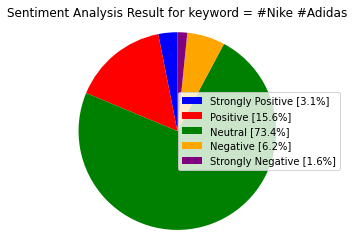

total number:  47
pure_neutrals number:  0
mild_neutrals number:  0


/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_axes.py:3201: RuntimeWarning: invalid value encountered in true_divide
  x = x / sx


ValueError: ignored

ValueError: ignored

<Figure size 640x480 with 1 Axes>

In [30]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Define the path to the directory containing the files
path = "/content/drive/MyDrive/Group_project"

# Prompt the user to enter the filename
filename = input("Enter the name of the operation you want to run: 1. content analysis /n 2. similarity analysis /n 3. sentiment analysis ")

# Run the corresponding file
if filename == "content analysis" or filename == "1":
    %run "{path}/content.ipynb"
elif filename == "similarity analysis" or filename == "2":
    %run "{path}/similarity.ipynb"
elif filename == "sentiment analysis" or filename == "3":
    %run "{path}/sentiment.ipynb"
else:
    print("Invalid filename. Please try again.")
